In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [23]:
class MyLinearRegression:
    def __init__(
        self,
        learning_rate=0.01,
        num_iterations=2000,
        tol=1e-4,
    ):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.coeffs = None
        self.loss_history = []
        self.tol = tol

    def _mean_squared_error(self, y, y_hat):
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        return error / len(y)

    def fit(self, X, y):
        y = y.to_numpy().reshape(-1, 1)
        self.loss_history, W = self.gradient_descent(X, y)
        self.coeffs = W
        return self

    def plot_loss_history(self):
        plt.plot(self.loss_history)
        plt.xlabel("Iteration")
        plt.ylabel("MSE")
        plt.title("MSE per iteration")
        plt.show()

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        return X.dot(self.coeffs)

    def gradient_descent(self, X, y, tolerance=1e-6, max_iterations=2000):
        n_samples, n_features = X.shape
        iterations = 0
        W = np.zeros(n_features + 1)
        mse_history = []

        X = np.insert(X, 0, 1, axis=1)

        while iterations < max_iterations:
            y_hat = np.dot(X, W)
            loss = self._mean_squared_error(y, y_hat)
            mse_history.append(loss)

            gradients = (1 / n_samples) * (2 * np.dot(X.T, (y_hat.reshape(-1, 1) - y)))

            W -= self.learning_rate * gradients.flatten()

            if (
                len(mse_history) > 1
                and abs(mse_history[-1] - mse_history[-2]) < tolerance
            ):
                break

            iterations += 1

        return mse_history, W

In [24]:
data_set = pd.read_csv('insurance.csv')
df = pd.DataFrame(data_set)

In [25]:
df.shape

(1338, 7)

In [26]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [27]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [28]:
df[["sex", "smoker", "region"]] = df[["sex", "smoker", "region"]].astype("category")
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

In [29]:
if df.isna().any().any():
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

There are no NaN values in the DataFrame.


MyLinearRegression MSE: 32291520.021294396
Scikit-Learn LinearRegression MSE: 31845929.134159435


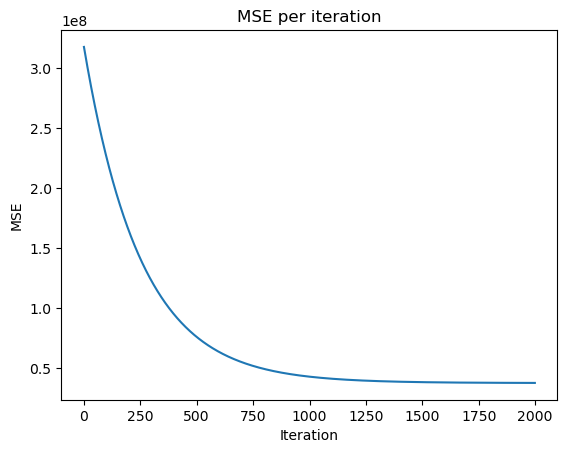

In [30]:
x = df.drop(["charges"], axis=1)
y = df["charges"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

regressor = MyLinearRegression(
    learning_rate=0.001, num_iterations=2000, tol=1e-4
)
regressor.fit(x_train_scaled, y_train)
y_pred = regressor.predict(x_test_scaled)

from sklearn.linear_model import LinearRegression

sk_regressor = LinearRegression()
sk_regressor.fit(x_train, y_train)
sk_y_pred = sk_regressor.predict(x_test)

print("MyLinearRegression MSE:", mean_squared_error(y_test, y_pred))
print("Scikit-Learn LinearRegression MSE:", mean_squared_error(y_test, sk_y_pred))

regressor.plot_loss_history()